In [1]:
from gfn import GFNAgent

In [3]:
agent = GFNAgent()

First, let's take a look at the environment. The default is a 2D 8x8 grid with high reward in the corners.

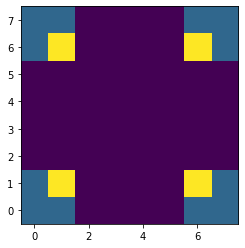

In [4]:
agent.env.plot_reward_2d()

We can also look at the model structure. Notice that in this implementation, the learned parameter `z0` is separate from the neural net, and that the neural net has two output "heads": `foward_policy` and `backward_policy`. 

In [5]:
agent.model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 2, 8)]       0           []                               
                                                                                                  
 flatten_1 (Flatten)            (None, 16)           0           ['input[0][0]']                  
                                                                                                  
 dense_1 (Dense)                (None, 32)           544         ['flatten_1[0][0]']              
                                                                                                  
 dense_2 (Dense)                (None, 32)           1056        ['dense_1[0][0]']                
                                                                                            

In [6]:
agent.z0

<tf.Variable 'z0:0' shape=() dtype=float32, numpy=0.0>

For this demonstration, we'll just show that the GFlowNet can learn a policy that generates trajectories proportional to the reward. To do that, we'll first sample a large training set using the untrained, random policy.

157/157 [==============================] - 1s 990us/step


2022-05-02 16:12:36.302059: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


157/157 [==============================] - 0s 1ms/step


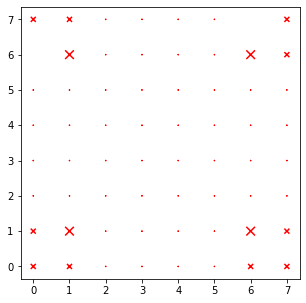

In [7]:
agent.sample(5000)
agent.plot_sampled_data_2d()

In [8]:
u_modes, u_positions = agent.count_modes()
print(f'There are {u_modes} unique modes and {u_positions} unique positions in the training data.')

There are 4 unique modes and 62 unique positions in the training data.


Before training, the policy is uniform. The likelihood of transitioning vertically or laterally (arrows) or terminating (red octogon) is essentially uniform at every point.

The probability of terminating at each position is plotted below, and we can see that without training, it looks nothing like the reward environment we plotted above. The termination probabilities are large enough, that any trajectory is unlikely to leave the origin (bottom left).

2/2 [==============================] - 0s 2ms/step


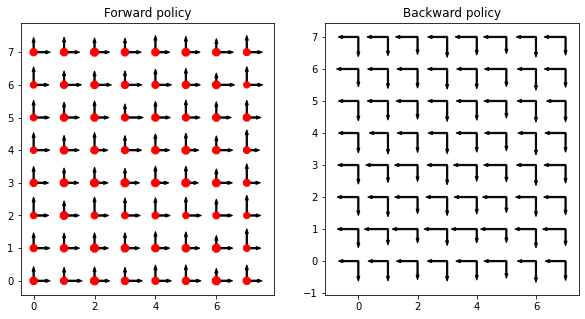

In [9]:
agent.plot_policy_2d()

63/63 [==============================] - 0s 1ms/step


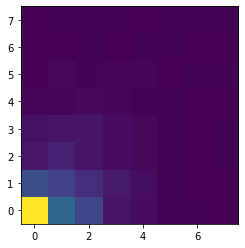

In [10]:
l1_error_before = agent.compare_env_to_model_policy()

Let's train it and see if we can do better!

In [11]:
agent.train()

Start training...
Epoch: 0 Loss: 5.537228584289551
Epoch: 9 Loss: 1.6838253736495972
Epoch: 18 Loss: 1.0585007667541504
Epoch: 27 Loss: 0.8956586718559265
Epoch: 36 Loss: 1.7291730642318726
Epoch: 45 Loss: 0.8406950831413269
Epoch: 54 Loss: 1.1237409114837646
Epoch: 63 Loss: 0.7334051132202148
Epoch: 72 Loss: 0.3754228949546814
Epoch: 81 Loss: 0.36592409014701843
Epoch: 90 Loss: 0.36322951316833496
Epoch: 99 Loss: 0.41489043831825256


Let's plot the trained policy and sample from it to get a probability distribution over the environment:

2/2 [==============================] - 0s 2ms/step


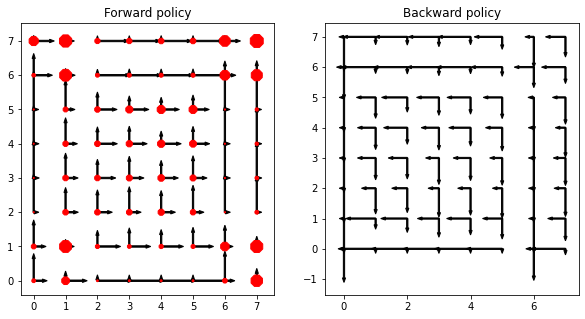

In [12]:
agent.plot_policy_2d()

63/63 [==============================] - 0s 1ms/step


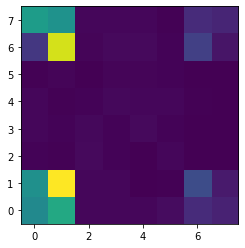

In [13]:
l1_error_after = agent.compare_env_to_model_policy()

In [14]:
print(f'L1 error before {l1_error_before:.2f} and after {l1_error_after:.2f}')

L1 error before 1.53 and after 0.69


While not perfect, the model has certainly learned to generate trajectories through the environment with probability proportional to the reward! It's a far better approximation than the untrained policy, and you can imagine that it would get better with some tweaks (e.g. more training, different optimizer, etc.)